How fast does the variance of PW decrease on different scales?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

from src.data import runs
from uwnet.thermo import periodogram


def plot_octants(octants, cmap=plt.cm.Reds):
    
    for k, (f, val) in enumerate(octants.groupby('f_bins')):
        val = val/val[0]
        c = f.mid/octants.f_bins.max().item().mid
        val.plot(c=cmap(c), label=k)
    plt.yticks([])
    plt.legend(frameon=False, title='Octant', ncol=2)
    
    
def compute_octants(pw):
    p = periodogram(pw, 'x')
    mean_tropics = p.sel(y=slice(4.5e6, 5.5e6)).mean('y')
    return mean_tropics.groupby_bins('f', 8).mean('f')

/Users/noah/anaconda/envs/uwnet/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/noah/anaconda/envs/uwnet/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


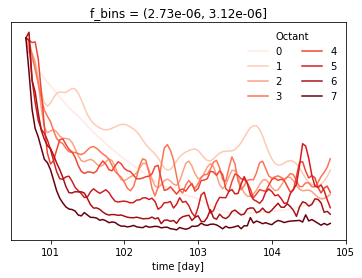

In [2]:
pw = runs['debias'].data_2d.PW.isel(time=slice(0, 100))

octants = compute_octants(pw)
plot_octants(octants)

We can see that the highest octants decrease the fastest. Within 1 day form initialization. Here are the sizes of the bins in wavelengths

In [3]:
bin_centers = [f.item().mid for f in octants.f_bins]

for k, center in enumerate(bin_centers):
    print("Octant", k, "Wavelength %.2f"%(1/(center*1e3)))

Octant 0 Wavelength 5156.23
Octant 1 Wavelength 1706.48
Octant 2 Wavelength 1025.12
Octant 3 Wavelength 732.60
Octant 4 Wavelength 569.80
Octant 5 Wavelength 466.20
Octant 6 Wavelength 394.48
Octant 7 Wavelength 341.88
